In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

print(tf.__version__)
print(len(tf.config.experimental.list_physical_devices('GPU')))

2.19.0
0


In [4]:
#IMPORTAÇÃO E NORRMALIZAÇÃO
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

#CRIAR DATASET
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(50000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(32, 32,3),batch_size=64),

        keras.layers.Conv2D(32, (3, 3), name="conv1", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn1"),
        keras.layers.Conv2D(32, (3, 3),name="conv2", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn2"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp1"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (3, 3),name="conv3", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn3"),
        keras.layers.Conv2D(64, (3, 3),name="conv4", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn4"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp2"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(128, (3, 3),name="conv5", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn5"),
        keras.layers.Conv2D(128, (3, 3),name="conv6", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn6"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp3"),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(name = "flatten"),

        keras.layers.Dense(256, name="dense1", activation='relu'),
        keras.layers.Dense(128, name="dense2", activation='relu', kernel_initializer='he_uniform'),
        keras.layers.BatchNormalization(name="bn7"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, name="dense3", activation='softmax')
    ],
    name="modelo-0.0",
)

for layer in model.trainable_variables:
    #print(layer.name)
    if 'bias' in layer.name:
        new_bias = tf.cast(tf.where(tf.abs(layer) >= 0, 0.1, 0.1), tf.float32)
        layer.assign(new_bias)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "modelo-0.0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (64, 32, 32, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (64, 32, 32, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp1 (MaxPooling2D)              │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (64, 16, 16, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (64, 16, 16, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2 (MaxPooling2D)              │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (64, 8, 8, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (64, 8, 8, 128)        │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp3 (MaxPooling2D)              │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (64, 256)              │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (64, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (64, 128)              │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (64, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (64, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 848,042 (3.24 MB)

 Trainable params: 846,890 (3.23 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

class QuantizationTrainer:
    def __init__(self, model, train_ds, test_ds, loss_fn,
                 train_accuracy, test_accuracy,
                 epochs=40, n_bits=4, learning_rate=0.05, momentum =0.9):

        self.model = model
        self.train_ds = train_ds
        self.test_ds = test_ds
        self.loss_fn = loss_fn
        self.train_accuracy = train_accuracy
        self.test_accuracy = test_accuracy

        # hyperparameters
        self.epochs = epochs
        self.n_bits = n_bits
        self.learning_rate = learning_rate
        self.momentum = 0.9
        self.v = [0]*len(model.trainable_weights)

        # logs
        self.model_sparsity = []
        self.model_train_loss = []
        self.model_train_acc = []
        self.model_test_loss = []
        self.model_test_acc = []

    def quantize_weights(self):
        """Quantiza pesos do modelo."""
        if self.n_bits <= 0:
            return

        for i, layer_weights in enumerate(self.model.trainable_variables):
            if 'bn' in layer_weights.name:
                continue
            qk_line = (tf.reduce_max(tf.math.abs(layer_weights))) / (2 ** (self.n_bits - 1) - 1)
            qk_line = tf.maximum(qk_line, 1e-9)
            ck = tf.math.round(layer_weights / qk_line) * qk_line
            layer_weights.assign(ck)
            #if qk_line != 0.0:


    def train(self):
      np.set_printoptions(threshold=np.inf)

      for epoch in range(self.epochs):
          acc_epoch_mean, loss_epoch_mean = [], []
          acct_epoch_mean, losst_epoch_mean = [], []

          for step, (x_batch_train, y_batch_train) in enumerate(self.train_ds):

              # Salva pesos reais antes da quantização
              original_weights = [tf.identity(w) for w in self.model.trainable_variables]

              # Forward com pesos quantizados (não altera pesos originais)
              if self.n_bits > 0:
                  for w, w_real in zip(self.model.trainable_variables, original_weights):
                      qk_line = (tf.reduce_max(tf.math.abs(w_real))) / (2 ** (self.n_bits - 1) - 1)
                      qk_line = tf.maximum(qk_line, 1e-9)
                      w.assign(tf.round(w_real / qk_line) * qk_line)

              # Cálculo da loss e do gradiente
              with tf.GradientTape() as tape:
                  pred = self.model(x_batch_train, training=True)
                  loss = self.loss_fn(y_batch_train, pred)

              grads = tape.gradient(loss, self.model.trainable_weights)

              # Restaura pesos float antes da atualização
              for w, w_real in zip(self.model.trainable_variables, original_weights):
                  w.assign(w_real)

              # Atualização com momentum
              for i, w in enumerate(self.model.trainable_variables):
                  if step == 0 and epoch == 0:
                      self.v[i] = grads[i] * 0.0
                  grads[i] = tf.clip_by_value(grads[i], -1.0, 1.0) * self.learning_rate
                  self.v[i] = self.momentum * self.v[i] - grads[i]
                  w.assign_add(self.v[i])  # w(n+1) = w(n) + Δw

              # Métricas
              predictions = tf.argmax(pred, axis=1, output_type=tf.int32)
              yy = tf.argmax(y_batch_train, axis=1, output_type=tf.int32)
              acc = self.train_accuracy(tf.reshape(y_batch_train, [-1]), predictions)

              acc_epoch_mean.append(acc)
              loss_epoch_mean.append(loss)

              self.train_accuracy.update_state(yy, predictions)

          # Quantização final opcional (para avaliação)
          if self.n_bits > 0:
              self.quantize_weights()

          # Teste
          for step, (x_batch_test, y_batch_test) in enumerate(self.test_ds):
              test_pred = self.model(x_batch_test, training=False)
              test_loss = self.loss_fn(y_batch_test, test_pred)
              test_prediction = tf.argmax(test_pred, axis=1, output_type=tf.int32)
              test_acc = self.test_accuracy(tf.reshape(y_batch_test, [-1]), test_prediction)

              acct_epoch_mean.append(test_acc)
              losst_epoch_mean.append(test_loss)

          # Logs
          self.model_test_acc.append(np.mean(acct_epoch_mean) * 100)
          self.model_test_loss.append(np.mean(losst_epoch_mean) * 100)
          self.model_train_acc.append(np.mean(acc_epoch_mean))
          self.model_train_loss.append(np.mean(loss_epoch_mean))

          print(f"Epoch {epoch+1}/{self.epochs} \t "
                f"Loss={float(loss):.3f} \t "
                f"Train Acc={float(acc)*100:.2f}% \t "
                f"Test Acc={float(test_acc)*100:.2f}%")


In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
train_accuracy = tf.keras.metrics.Accuracy()
test_accuracy = tf.keras.metrics.Accuracy()

In [9]:
trainer = QuantizationTrainer(model, train_ds, test_ds, loss_fn, train_accuracy, test_accuracy, epochs=10)
trainer.train()

Epoch 1/10 	 Loss=0.730 	 Train Acc=29.47% 	 Test Acc=48.89%
Epoch 2/10 	 Loss=1.325 	 Train Acc=33.90% 	 Test Acc=56.24%


KeyboardInterrupt: 

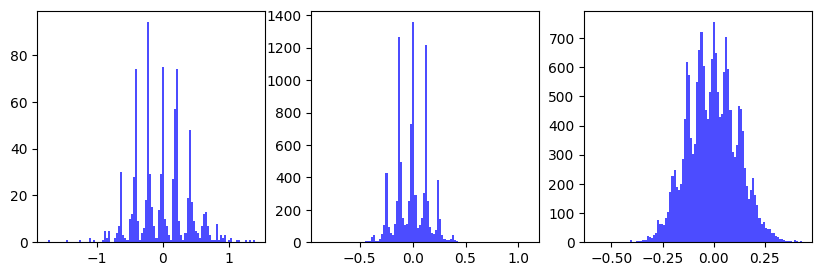

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
i = 0
for l in trainer.model.trainable_weights:
    if l.name == "kernel":
        f_w = tf.reshape(l, [-1])
        axes[i].hist(f_w, bins=100, color="blue", alpha=0.7)
        i+=1
        if i == 3:
            break